I study the apparent proper motion of radio sources to estimate the ICRF axis stability.

In [1]:
import matplotlib.pyplot as plt
# from matplotlib.ticker import MultipleLocator
import numpy as np
import statsmodels.api as sm
from astropy.time import Time
from astropy.table import Table, join

from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
import seaborn as sns

from my_progs.stat_func.rms_calc import rms_calc
from my_progs.catalog.ga_func import glide_apex_calc

In [2]:
icrf3_def = Table.read("../data/icrf3sx-def-sou.txt", format="ascii")

# 1 Distribution of the APM

In [3]:
apm_tab = Table.read("../data/ts_nju_pm_fit_3sigma-10step.dat", format="ascii.csv")

# convert mas/yr into muas/yr
apm_tab["pmra"] = apm_tab["pmra"] * 1e3
apm_tab["pmra_err"] = apm_tab["pmra_err"] * 1e3
apm_tab["pmdec"] = apm_tab["pmdec"] * 1e3
apm_tab["pmdec_err"] = apm_tab["pmdec_err"] * 1e3

Remove sources without apparant proper motion estimate.

Estimate the empirical cumulative probability function.

In [5]:
ecdf_pmra = sm.distributions.ECDF(apm_tab["pmra"])
ecdf_pmdec = sm.distributions.ECDF(apm_tab["pmdec"])

For the ICRF3 defining sources.

In [6]:
apm_def = join(icrf3_def, apm_tab, keys="iers_name")

In [7]:
ecdf_pmra_def = sm.distributions.ECDF(apm_def["pmra"])
ecdf_pmdec_def = sm.distributions.ECDF(apm_def["pmdec"])

Make the plot.

In [8]:
bin_array = np.arange(-100, 100, 5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


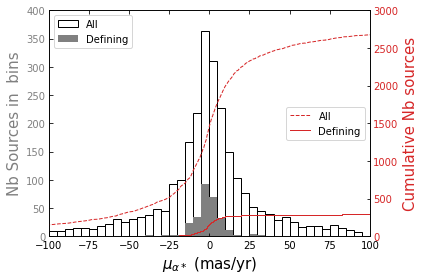

In [9]:
fig, ax1 = plt.subplots()

color = "grey"
ax1.hist(apm_tab["pmra"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax1.hist(apm_def["pmra"],
         bins=bin_array,
         color=color,
         label="Defining")
ax1.set_xlabel("$\\mu_{\\alpha*}$ (mas/yr)", fontsize=15)
ax1.set_ylabel("Nb Sources in  bins", color=color, fontsize=15)
ax1.tick_params(axis="y", labelcolor=color)
# ax1.axis([-100, 100, 0, 180])
ax1.axis([-100, 100, 0, 400])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = "tab:red"
ax2.plot(ecdf_pmra.x,
         ecdf_pmra.y * len(apm_tab),
         color=color,
         lw=1,
         ls="--",
         label="All")
ax2.step(ecdf_pmra_def.x,
         ecdf_pmra_def.y * len(apm_def),
         color=color,
         lw=1,
         ls="-",
         label="Defining")
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_ylabel("Cumulative Nb sources", color=color,
               fontsize=15)  # we already handled the x-label with ax1
# ax2.axis([-100, 100, 0, 1000])
ax2.axis([-100, 100, 0, 3000])
ax2.legend(loc="center right")

plt.tight_layout()
# plt.savefig("../plots/pmra-hist.eps")
plt.savefig("../plots/pmra-hist-nju.eps")

In [10]:
per = [0, 5, 10, 25, 50, 75, 90, 95, 100] 
Q = np.percentile(apm_tab["pmra"], per)

line_fmt1 = "  {:8d}" * len(per)
line_fmt2 = "  {:8.2f}" * len(Q)

print("PM in R.A. (muas/yr)")
print("Percentile(%)", line_fmt1.format(*per))
print("             ", line_fmt2.format(*Q))

lim = 30
mask = (np.fabs(apm_tab["pmra"]) < lim)
print("[-{:2d}, {:2d}]: {:.2f}%".format(lim, lim, len(apm_tab[mask])/len(apm_tab)*100))

PM in R.A. (muas/yr)
Percentile(%)          0         5        10        25        50        75        90        95       100
                -7457.50   -109.43    -56.41    -15.00     -0.48     14.52     54.32    110.61   5308.22
[-30, 30]: 67.33%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


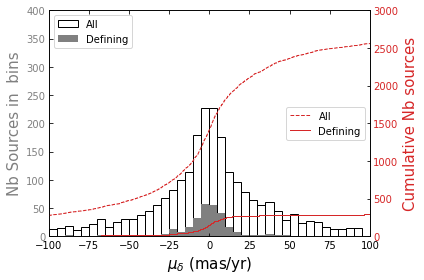

In [11]:
fig, ax1 = plt.subplots()


color = "grey"
ax1.hist(apm_tab["pmdec"],
         bins=bin_array,
         color=color,
         fill=False,
         label="All")
ax1.hist(apm_def["pmdec"],
         bins=bin_array,
         color=color,
         label="Defining")
ax1.set_xlabel("$\\mu_{\\delta}$ (mas/yr)", fontsize=15)
ax1.set_ylabel("Nb Sources in  bins", color=color, fontsize=15)
ax1.tick_params(axis="y", labelcolor=color)
# ax1.axis([-100, 100, 0, 180])
ax1.axis([-100, 100, 0, 400])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = "tab:red"
ax2.step(ecdf_pmdec.x,
         ecdf_pmdec.y * len(apm_tab),
         color=color,
         lw=1,
         ls="--",
         label="All")
ax2.step(ecdf_pmdec_def.x,
         ecdf_pmdec_def.y * len(apm_def),
         color=color,
         lw=1,
         ls="-",
         label="Defining")
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_ylabel("Cumulative Nb sources", color=color,
               fontsize=15)  # we already handled the x-label with ax1
# ax2.axis([-100, 100, 0, 1000])
ax2.axis([-100, 100, 0, 3000])
ax2.legend(loc="center right")

plt.tight_layout()
# plt.savefig("../plots/pmdec-hist.eps")
plt.savefig("../plots/pmdec-hist-nju.eps")

In [12]:
per = [0, 5, 10, 25, 50, 75, 90, 95, 100] 
Q = np.percentile(apm_tab["pmdec"], per)

line_fmt1 = "  {:8d}" * len(per)
line_fmt2 = "  {:8.2f}" * len(Q)

print("PM in decl. (muas/yr)")
print("Percentile(%)", line_fmt1.format(*per))
print("             ", line_fmt2.format(*Q))

lim = 30
mask = (np.fabs(apm_tab["pmdec"]) < lim)
print("[-{:2d}, {:2d}]: {:.2f}%".format(lim, lim, len(apm_tab[mask])/len(apm_tab)*100))

PM in decl. (muas/yr)
Percentile(%)          0         5        10        25        50        75        90        95       100
                -9522.33   -193.60    -97.71    -25.27      0.15     26.47     95.26    188.40  16043.79
[-30, 30]: 53.87%


In [13]:
mean_pmra = np.mean(apm_tab["pmra"])
median_pmra = np.median(apm_tab["pmra"])
std_pmra = np.std(apm_tab["pmra"])

mean_pmdec = np.mean(apm_tab["pmdec"])
median_pmdec = np.median(apm_tab["pmdec"])
std_pmdec = np.std(apm_tab["pmdec"])

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [14]:
mean_pmra_def = np.mean(apm_def["pmra"])
median_pmra_def = np.median(apm_def["pmra"])
std_pmra_def = np.std(apm_def["pmra"])

mean_pmdec_def = np.mean(apm_def["pmdec"])
median_pmdec_def = np.median(apm_def["pmdec"])
std_pmdec_def = np.std(apm_def["pmdec"])

In [15]:
se = np.vstack([[len(apm_tab), mean_pmra, median_pmra, std_pmra],
                [len(apm_tab), mean_pmdec, median_pmdec, std_pmdec],
                [len(apm_def), mean_pmra_def, median_pmra_def, std_pmra_def],
                [len(apm_def), mean_pmdec_def, median_pmdec_def, std_pmdec_def]])

se = np.round(se, 2)

colnames = ["#sou", "Mean", "Median", "Std"]
rownames = ["All-RA", "All-Dec", "Def-RA", "Def-Dec"]

tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)
print("Unit: muas/yr")

         #sou   Mean Median  Std  
----------------------------------
All-RA  2831.0 -5.86  -0.48 256.23
All-Dec 2831.0 -6.47   0.15 467.04
Def-RA   290.0  0.81  -0.52   19.1
Def-Dec  290.0 -3.55   -0.4  31.94
----------------------------------
Unit: muas/yr


# 2. Global spin from the ICRF3-defining source subset

In [16]:
from tool_func import vsh_fit_for_pm, vsh_fit_for_pm2

In [17]:
pmt, sig, output = vsh_fit_for_pm(apm_def)
pmt1, sig1, output1 = vsh_fit_for_pm2(apm_def)

----------------------- VSH Fit (by Niu LIU) -----------------------

Pre-fit information:
    Number of sources                       290
    Maximum degree of VSH                     1
    Number of unknowns to determine           6
    Number of degree of freedom             573

No constraint is put on the data, so the fitting will be done only once.

Convert t_lm/s_lm at l=1 into rotation/glide vector
--------------------------------------------------------------------
           Glide [dex]                 Rotation [dex]   
  G1         G2        G3         R1         R2        R3       
--------------------------------------------------------------------
  +1    0    -1    0   -1    0    -1    0   -0    0    -0    0  
--------------------------------------------------------------------


In [18]:
se = np.vstack((pmt[:4], sig[:4], pmt1, sig1)).T
se = np.round(se, 2)

colnames = ["Full", "+/-", "Rotation", "+/-"]
rownames = ["Rx", "Ry", "Rz", "R"]

tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

se = np.vstack((pmt[4:], sig[4:])).T
se = np.round(se, 2)

colnames = ["Glide", "+/-"]
rownames = ["Gx", "Gy", "Gz", "G"]

tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

print("Unit: muas/yr")
print("Number of sources used in the fitting is", len(apm_def))

    Full +/-  Rotation +/- 
---------------------------
Rx -0.65 0.29    -0.14 0.23
Ry -0.03 0.32     0.48 0.29
Rz -0.26 0.21    -0.32 0.22
R    0.7 0.28     0.59 0.25
---------------------------
   Glide +/- 
-------------
Gx  0.76 0.24
Gy -0.99 0.27
Gz -0.88  0.3
G   1.53 0.26
-------------
Unit: muas/yr
Number of sources used in the fitting is 290


In [19]:
print("Apex for rotation (deg)")
print("      Full      Rotation")
print("RA : {:3.0f} +/- {:3.0f}  {:3.0f} +/- {:3.0f}".format(
    output["R_ra"], output["R_ra_err"], output1["R_ra"], output1["R_ra_err"]))
print("Dec: {:3.0f} +/- {:3.0f}  {:3.0f} +/- {:3.0f}".format(
    output["R_dec"], output["R_dec_err"], output1["R_dec"],
    output1["R_dec_err"]))

print("Apex for glide (deg)")
print("      Glide")
print("RA : {:3.0f} +/- {:3.0f}  ".format(
    output["G_ra"], output["G_ra_err"]))
print("Dec: {:3.0f} +/- {:3.0f}".format(
    output["G_dec"], output["G_dec_err"]))

Apex for rotation (deg)
      Full      Rotation
RA : 183 +/-  28  107 +/-  27
Dec: -22 +/-  18  -32 +/-  25
Apex for glide (deg)
      Glide
RA : 307 +/-  12  
Dec: -35 +/-  11


# 3 Global Spin from the whole sample

In [20]:
spin_tab = Table.read("../logs/spin_fit_from_glo_ts-10step.txt", format="ascii")

/var/folders/cx/w871dcfn6h18zc_07dj7mxgm0000gn/T/ipykernel_12591/390599747.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-^" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(spin_tab["num_sou"],
/var/folders/cx/w871dcfn6h18zc_07dj7mxgm0000gn/T/ipykernel_12591/390599747.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-s" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(spin_tab["num_sou"],
/var/folders/cx/w871dcfn6h18zc_07dj7mxgm0000gn/T/ipykernel_12591/390599747.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(spin_tab["num_sou"],


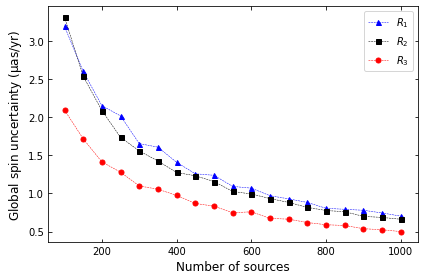

In [21]:
fig, ax = plt.subplots()

ax.plot(spin_tab["num_sou"],
         spin_tab["rx_std"],
         "b-^",
         ms=5,
         ls="--",
         lw=0.5,
         label="$R_1$")
ax.plot(spin_tab["num_sou"],
         spin_tab["ry_std"],
         "k-s",
         ms=5,
         ls="--",
         lw=0.5,
         label="$R_2$")
ax.plot(spin_tab["num_sou"],
         spin_tab["rz_std"],
         "r-o",
         ms=5,
         ls="--",
         lw=0.5,
         label="$R_3$")


ax.set_xlabel("Number of sources", fontsize=12)
ax.set_ylabel("Global spin uncertainty ($\mathrm{\mu as/yr}$)", fontsize=12)

# ax.axis([50, 1250, 0.3, 0.5])
ax.legend(bbox_to_anchor=(1., 1))

plt.tight_layout()


/var/folders/cx/w871dcfn6h18zc_07dj7mxgm0000gn/T/ipykernel_12591/3059993868.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-^" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(spin_tab["num_sou"],
/var/folders/cx/w871dcfn6h18zc_07dj7mxgm0000gn/T/ipykernel_12591/3059993868.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-s" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(spin_tab["num_sou"],
/var/folders/cx/w871dcfn6h18zc_07dj7mxgm0000gn/T/ipykernel_12591/3059993868.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(spin_tab["num_sou"],


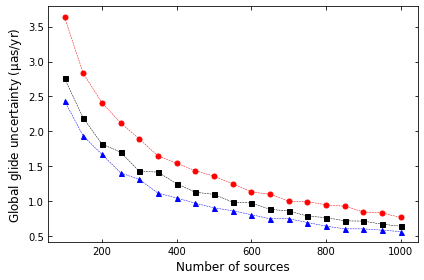

In [22]:
fig, ax = plt.subplots()

ax.plot(spin_tab["num_sou"],
         spin_tab["gx_std"],
         "b-^",
         ms=5,
         ls="--",
         lw=0.5,
         label="$G_1$")
ax.plot(spin_tab["num_sou"],
         spin_tab["gy_std"],
         "k-s",
         ms=5,
         ls="--",
         lw=0.5,
         label="$G_2$")
ax.plot(spin_tab["num_sou"],
         spin_tab["gz_std"],
         "r-o",
         ms=5,
         ls="--",
         lw=0.5,
         label="$G_3$")


ax.set_xlabel("Number of sources", fontsize=12)
ax.set_ylabel("Global glide uncertainty ($\mathrm{\mu as/yr}$)", fontsize=12)

# ax.axis([50, 1250, 0.3, 0.5])
# ax.legend(bbox_to_anchor=(1., 1))

plt.tight_layout()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


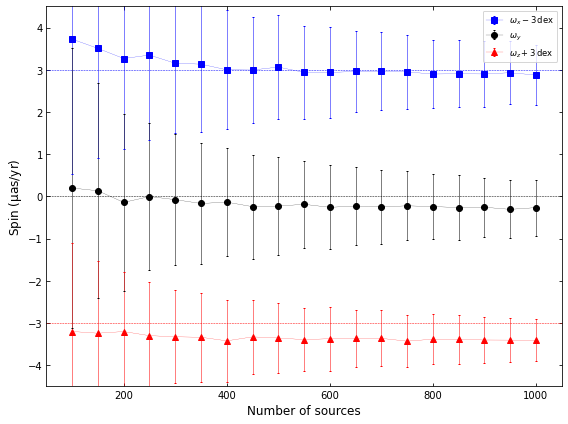

In [23]:
# fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(6, 8), nrows=4, sharex=True)
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(3, 50, 1050, ls="dashed", color="b", lw=0.5)
ax.hlines(0, 50, 1050, ls="dashed", color="k", lw=0.5)
ax.hlines(-3, 50, 1050, ls="dashed", color="r", lw=0.5)

ax.errorbar(spin_tab["num_sou"],
             spin_tab["rx_mean"]+3,
             yerr=spin_tab["rx_std"],
             color="blue",
             fmt="-s",
             elinewidth=0.5,
             lw=0.2,
#              label="$\\omega_x+3\,\mathrm{\mu as/yr}$",
             label="$\\omega_x-3\,\mathrm{dex}$",
             capsize=1)
ax.errorbar(spin_tab["num_sou"],
             spin_tab["ry_mean"],
             yerr=spin_tab["ry_std"],
             color="black",
             fmt="-o",
             elinewidth=0.5,
             lw=0.2,
             label="$\\omega_y$",
             capsize=1)
ax.errorbar(spin_tab["num_sou"],
             spin_tab["rz_mean"]-3,
             yerr=spin_tab["rz_std"],
             color="red",
             fmt="-^",
             elinewidth=0.5,
             lw=0.2,
#              label="$\\omega_z-3\,\mathrm{\mu as/yr}$",
             label="$\\omega_z+3\,\mathrm{dex}$",
             capsize=1)


ax.axis([50, 1050, -4.5, 4.5])

ax.set_xlabel("Number of sources", fontsize=12)
ax.set_ylabel("Spin ($\mathrm{\mu as/yr}$)", fontsize=12)


ax.legend(loc="upper right", fontsize="small")
# ax.legend(bbox_to_anchor=(1., 1.01), fontsize="small")

# plt.title("Spin from 10-step solution", fontsize=12)
plt.tight_layout()
# plt.savefig("../plots/spin-from-apm-nju-10step.eps")
plt.savefig("../plots/spin-from-apm-nju.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


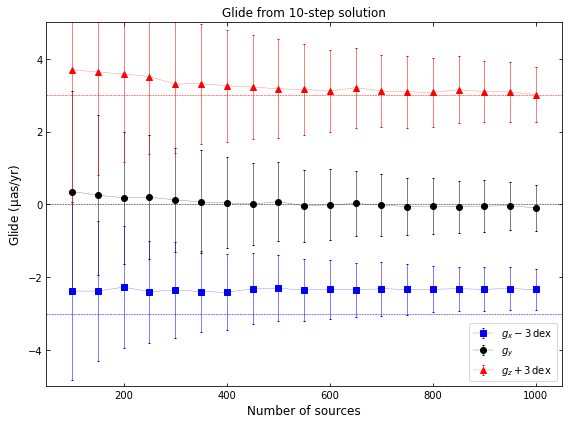

In [24]:
# fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(6, 8), nrows=4, sharex=True)
fig, ax = plt.subplots(figsize=(8, 6))

ax.hlines(3, 50, 1050, ls="dashed", color="r", lw=0.5)
ax.hlines(0, 50, 1050, ls="dashed", color="k", lw=0.5)
ax.hlines(-3, 50, 1050, ls="dashed", color="b", lw=0.5)

ax.errorbar(spin_tab["num_sou"],
             spin_tab["gx_mean"]-3,
             yerr=spin_tab["gx_std"],
             color="blue",
             fmt="-s",
             elinewidth=0.5,
             lw=0.2,
#              label="$\\omega_x+3\,\mathrm{\mu as/yr}$",
             label="$g_x-3\,\mathrm{dex}$",
             capsize=1)
ax.errorbar(spin_tab["num_sou"],
             spin_tab["gy_mean"],
             yerr=spin_tab["gy_std"],
             color="black",
             fmt="-o",
             elinewidth=0.5,
             lw=0.2,
             label="$g_y$",
             capsize=1)
ax.errorbar(spin_tab["num_sou"],
             spin_tab["gz_mean"]+3,
             yerr=spin_tab["gz_std"],
             color="red",
             fmt="-^",
             elinewidth=0.5,
             lw=0.2,
#              label="$\\omega_z-3\,\mathrm{\mu as/yr}$",
             label="$g_z+3\,\mathrm{dex}$",
             capsize=1)


ax.axis([50, 1050, -5, 5])

ax.set_xlabel("Number of sources", fontsize=12)
ax.set_ylabel("Glide ($\mathrm{\mu as/yr}$)", fontsize=12)

ax.legend(loc="lower right")

plt.title("Glide from 10-step solution", fontsize=12)
plt.tight_layout()
plt.savefig("../plots/glide-from-apm-nju-10step.eps")

In [25]:
rx_q1q3 = np.vstack((spin_tab["rx_q2"] - spin_tab["rx_q1"],
                     spin_tab["rx_q3"] - spin_tab["rx_q2"]))
ry_q1q3 = np.vstack((spin_tab["ry_q2"] - spin_tab["ry_q1"],
                     spin_tab["ry_q3"] - spin_tab["ry_q2"]))
rz_q1q3 = np.vstack((spin_tab["rz_q2"] - spin_tab["rz_q1"],
                     spin_tab["rz_q3"] - spin_tab["rz_q2"]))
r_q1q3 = np.vstack((spin_tab["r_q2"] - spin_tab["r_q1"],
                    spin_tab["r_q3"] - spin_tab["r_q2"]))

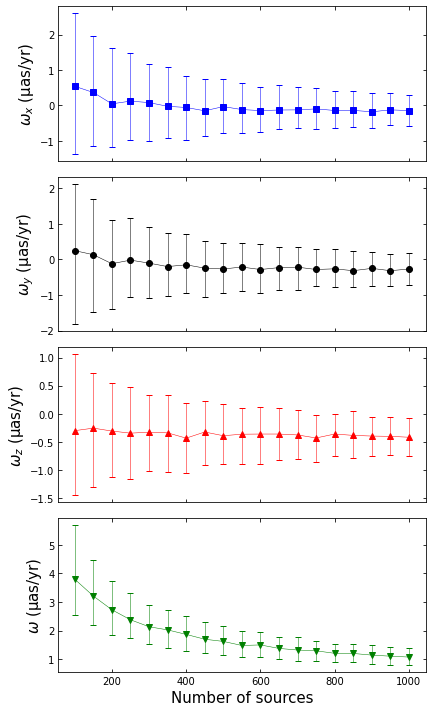

In [26]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize=(6, 10), nrows=4, sharex=True)

ax0.errorbar(spin_tab["num_sou"],
             spin_tab["rx_q2"],
             yerr=rx_q1q3,
             color="blue",
             fmt="-s",
             elinewidth=0.5,
             lw=0.5,
             label="$R_1$",
             capsize=3)
ax1.errorbar(spin_tab["num_sou"],
             spin_tab["ry_q2"],
             yerr=ry_q1q3,
             color="black",
             fmt="-o",
             elinewidth=0.5,
             lw=0.5,
             label="$R_2$",
             capsize=3)
ax2.errorbar(spin_tab["num_sou"],
             spin_tab["rz_q2"],
             yerr=rz_q1q3,
             color="red",
             fmt="-^",
             elinewidth=0.5,
             lw=0.5,
             label="$R_3$",
             capsize=3)
ax3.errorbar(spin_tab["num_sou"],
             spin_tab["r_q2"],
             yerr=r_q1q3,
             color="green",
             fmt="-v",
             elinewidth=0.5,
             lw=0.5,
             label="$R$",
             capsize=3)

ax3.set_xlabel("Number of sources", fontsize=15)
ax0.set_ylabel("$\\omega_x$ ($\mathrm{\mu as/yr}$)", fontsize=15)
ax1.set_ylabel("$\\omega_y$ ($\mathrm{\mu as/yr}$)", fontsize=15)
ax2.set_ylabel("$\\omega_z$ ($\mathrm{\mu as/yr}$)", fontsize=15)
ax3.set_ylabel("$\\omega$ ($\mathrm{\mu as/yr}$)", fontsize=15)

plt.tight_layout()
# plt.savefig("../plots/spin-from-apm.eps")

In [27]:
wmean1, wrms1, wstd1 = rms_calc(spin_tab["rx_mean"])
wmean2, wrms2, wstd2 = rms_calc(spin_tab["ry_mean"])
wmean3, wrms3, wstd3 = rms_calc(spin_tab["rz_mean"])

print("No weighted")
print("    Mean    RMS   Std")
print("   uas/yr uas/yr uas/yr")
print("R1  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean3, wrms3, wstd3)) 

No weighted
    Mean    RMS   Std
   uas/yr uas/yr uas/yr
R1  +0.08   0.24   0.23
R2  -0.17   0.22   0.14
R3  -0.35   0.37   0.07


In [28]:
wmean1, wrms1, wstd1 = rms_calc(spin_tab["rx_mean"], spin_tab["rx_std"])
wmean2, wrms2, wstd2 = rms_calc(spin_tab["ry_mean"], spin_tab["ry_std"])
wmean3, wrms3, wstd3 = rms_calc(spin_tab["rz_mean"], spin_tab["rz_std"])

print("Weighted")
print("    Mean   WRMS   Std")
print("   uas/yr uas/yr uas/yr")
print("R1  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean3, wrms3, wstd3)) 

Weighted
    Mean   WRMS   Std
   uas/yr uas/yr uas/yr
R1  -0.04   0.12   0.12
R2  -0.23   0.24   0.07
R3  -0.38   0.38   0.04


In [29]:
R = np.array([wmean1, wmean2, wmean3])
R_err = np.array([wstd1, wstd2, wstd3])
r, RAdeg, DCdeg, r_err, RAdeg_err, DCdeg_err = glide_apex_calc(R, R_err)

print("The amplitude is {:.2f} +/- {:.2f} dex, "
      "apex of ({:.2f} +/- {:.2f}, "
      "{:.2f} +/- {:.2f}) deg.".format(
          r, r_err, 
          RAdeg, RAdeg_err, 
          DCdeg, DCdeg_err))

The amplitude is 0.45 +/- 0.05 dex, apex of (260.19 +/- 27.57, -58.13 +/- 8.25) deg.


In [30]:
wmean1, wrms1, wstd1 = rms_calc(spin_tab["gx_mean"])
wmean2, wrms2, wstd2 = rms_calc(spin_tab["gy_mean"])
wmean3, wrms3, wstd3 = rms_calc(spin_tab["gz_mean"])

print("No weighted")
print("    Mean    RMS   Std")
print("   uas/yr uas/yr uas/yr")
print("G1  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean1, wrms1, wstd1))
print("G2  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean2, wrms2, wstd2))
print("G3  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean3, wrms3, wstd3)) 

No weighted
    Mean    RMS   Std
   uas/yr uas/yr uas/yr
G1  +0.65   0.67   0.04
G2  +0.05   0.13   0.12
G3  +0.25   0.33   0.21


In [31]:
wmean1, wrms1, wstd1 = rms_calc(spin_tab["gx_mean"], spin_tab["gx_std"])
wmean2, wrms2, wstd2 = rms_calc(spin_tab["gy_mean"], spin_tab["gy_std"])
wmean3, wrms3, wstd3 = rms_calc(spin_tab["gz_mean"], spin_tab["gz_std"])

print("Weighted")
print("    Mean   WRMS   Std")
print("   uas/yr uas/yr uas/yr")
print("G1  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean1, wrms1, wstd1))
print("G2  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean2, wrms2, wstd2))
print("G3  {:+4.2f}   {:4.2f}   {:.2f}".format(wmean3, wrms3, wstd3)) 

Weighted
    Mean   WRMS   Std
   uas/yr uas/yr uas/yr
G1  +0.66   0.66   0.03
G2  -0.02   0.08   0.07
G3  +0.14   0.19   0.12


In [32]:
G = np.array([wmean1, wmean2, wmean3])
G_err = np.array([wstd1, wstd2, wstd3])
r, RAdeg, DCdeg, r_err, RAdeg_err, DCdeg_err = glide_apex_calc(G, G_err)

print("The amplitude is {:.2f} +/- {:.2f} dex, "
      "apex of ({:.2f} +/- {:.2f}, "
      "{:.2f} +/- {:.2f}) deg.".format(
          r, r_err, 
          RAdeg, RAdeg_err, 
          DCdeg, DCdeg_err))

The amplitude is 0.68 +/- 0.04 dex, apex of (358.52 +/- 6.34, 12.25 +/- 9.74) deg.


Consider the time span of J1979.59 - J2021.15.

In [33]:
epoch1 = Time("1979-08-03", scale="utc")
epoch2 = Time("2020-12-31", scale="utc")

dt = epoch2.jyear - epoch1.jyear
spin = 0.66

print("Spin : {:.1f} muas/yr".format(spin))
print("Time span : {:.1f} yr".format(dt))
print("Deformation : {:.1f} muas".format(spin*dt))

spin = 0.04

print("Spin : {:.1f} muas/yr".format(spin))
print("Time span : {:.1f} yr".format(dt))
print("Deformation : {:.1f} muas".format(spin*dt))

spin = 0.26

print("Spin : {:.1f} muas/yr".format(spin))
print("Time span : {:.1f} yr".format(dt))
print("Deformation : {:.1f} muas".format(spin*dt))

Spin : 0.7 muas/yr
Time span : 41.4 yr
Deformation : 27.3 muas
Spin : 0.0 muas/yr
Time span : 41.4 yr
Deformation : 1.7 muas
Spin : 0.3 muas/yr
Time span : 41.4 yr
Deformation : 10.8 muas


In [34]:
epoch1 = Time("1979-08-03", scale="utc")
epoch2 = Time("2020-12-31", scale="utc")

dt = epoch2.jyear - epoch1.jyear
spin = 0.04

print("Spin : {:.1f} muas/yr".format(spin))
print("Time span : {:.1f} yr".format(dt))
print("Deformation : {:.1f} muas".format(spin*dt))

spin = 0.23

print("Spin : {:.1f} muas/yr".format(spin))
print("Time span : {:.1f} yr".format(dt))
print("Deformation : {:.1f} muas".format(spin*dt))

spin = 0.38

print("Spin : {:.1f} muas/yr".format(spin))
print("Time span : {:.1f} yr".format(dt))
print("Deformation : {:.1f} muas".format(spin*dt))

Spin : 0.0 muas/yr
Time span : 41.4 yr
Deformation : 1.7 muas
Spin : 0.2 muas/yr
Time span : 41.4 yr
Deformation : 9.5 muas
Spin : 0.4 muas/yr
Time span : 41.4 yr
Deformation : 15.7 muas


In [35]:
epoch1 = Time("1979-08-03", scale="utc")
epoch2 = Time("2020-12-31", scale="utc")

dt = epoch2.jyear - epoch1.jyear
spin = 0.8

print("Spin : {:.1f} muas/yr".format(spin))
print("Time span : {:.1f} yr".format(dt))
print("Deformation : {:.1f} muas".format(spin*dt))

Spin : 0.8 muas/yr
Time span : 41.4 yr
Deformation : 33.1 muas
